# 1. Data Preparation:

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = r'D:\Christ\Sem 3\DL\lab 5\Data'

In [2]:
target_size = (64, 64) 
batch_size = 32 

rotation_range = 40  
width_shift_range = 0.2  
height_shift_range = 0.2  
shear_range = 0.2  
zoom_range = 0.2 
horizontal_flip = True  
brightness_range = [0.8,1.2]  

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=rotation_range,
    width_shift_range=width_shift_range,
    height_shift_range=height_shift_range,
    shear_range=shear_range,
    zoom_range=zoom_range,
    horizontal_flip=horizontal_flip,
    brightness_range=brightness_range,
    validation_split=0.2  
)


train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',  
    subset='training') 

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')  

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


# CNN Architecture

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout

model = Sequential()

# Convolutional layer 1 with Batch Normalization
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2 with Batch Normalization
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 3 with Batch Normalization
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Fully connected layer 1
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5)) 

# Output layer
model.add(Dense(4, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 64, 64, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        2

# combile the model

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Training the Model

In [5]:
from tensorflow.keras.callbacks import TensorBoard
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10, 
    callbacks=[tensorboard_callback]
)


Epoch 1/10
100/100 [==============================] - 48s 455ms/step - loss: 1.2143 - accuracy: 0.5269 - val_loss: 1.6732 - val_accuracy: 0.2500
Epoch 2/10
100/100 [==============================] - 20s 197ms/step - loss: 0.9191 - accuracy: 0.6175 - val_loss: 1.4302 - val_accuracy: 0.2512
Epoch 3/10
100/100 [==============================] - 19s 192ms/step - loss: 0.8600 - accuracy: 0.6372 - val_loss: 1.6417 - val_accuracy: 0.3663
Epoch 4/10
100/100 [==============================] - 20s 196ms/step - loss: 0.8273 - accuracy: 0.6587 - val_loss: 1.6213 - val_accuracy: 0.3638
Epoch 5/10
100/100 [==============================] - 19s 189ms/step - loss: 0.7931 - accuracy: 0.6597 - val_loss: 1.3629 - val_accuracy: 0.4863
Epoch 6/10
100/100 [==============================] - 19s 191ms/step - loss: 0.7662 - accuracy: 0.6822 - val_loss: 0.9576 - val_accuracy: 0.5975
Epoch 7/10
100/100 [==============================] - 18s 185ms/step - loss: 0.7634 - accuracy: 0.6853 - val_loss: 0.8478 - val_ac

# Visualizations

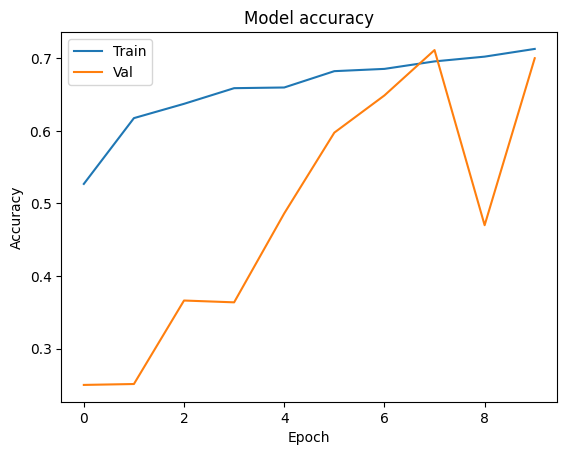

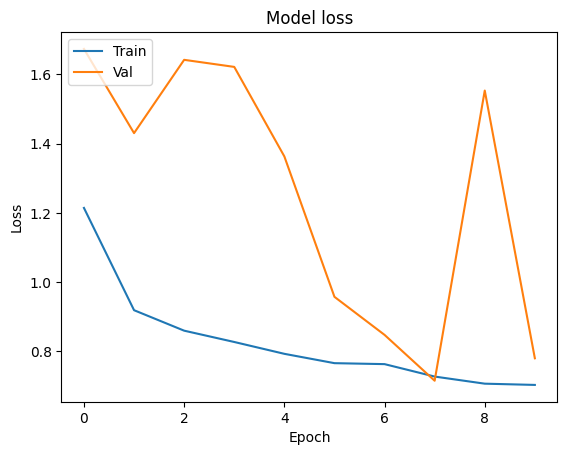

In [6]:
import matplotlib.pyplot as plt

# training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

25/25 [==============================] - 2s 85ms/step


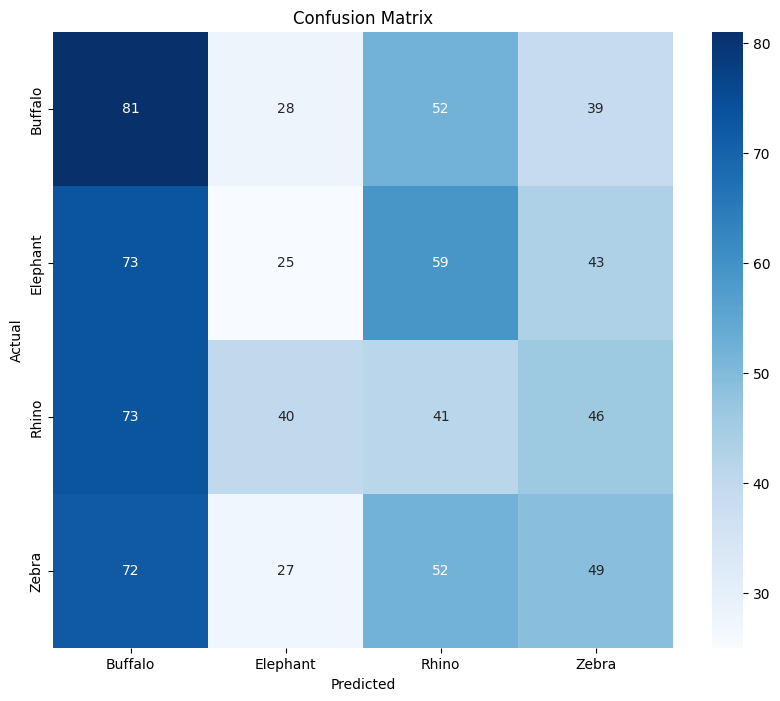

In [7]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

validation_generator.reset()  
predictions = model.predict(validation_generator, steps=len(validation_generator))
predicted_classes = np.argmax(predictions, axis=1)

true_classes = validation_generator.classes

cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=validation_generator.class_indices, yticklabels=validation_generator.class_indices)
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# Class Activation Maps
Class Activation Maps (CAMs) show the regions of the image that were most influential in making a classification decision. Implementing CAMs from scratch can be complex, but you can achieve a similar effect with Grad-CAM, which uses the gradients of any target concept (like output class) flowing into the final convolutional layer to produce a coarse localization map highlighting the important regions in the image for predicting the concept.